# Objectives 
- 고객의 대출 등급에 따른 분류
- EDA(탐색적데이터탐색) 이후 isnull().sum(), 단위제거 및 자료형 변환 
- pd.concat, Feature Engineering

train.csv [파일] 
고객 관련 금융 정보
ID : 대출 고객의 고유 ID
대출등급 : 예측 목표


test.csv [파일]
고객 관련 금융 정보
ID : 대출 고객의 고유 ID
대출등급이 존재하지 않음


sample_submission.csv [파일] - 제출 양식
ID : 대출 고객의 고유 ID
대출등급 : test.csv에서 제공된 고객의 대출등급을 예측하여 기입


## Import Functions

In [24]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


## Load Train Data

In [26]:
# 학습용 데이터 불러오기

train_path = 'D:\Code\[중]고객 대출 등급 분류 해커톤/train.csv'

df_train = pd.read_csv(train_path)

print(f'학습용 데이터 : \n{df_train}')

df_train.isnull().sum()

# 누락 데이터 없음

학습용 데이터 : 
                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [28]:
# 정답, 레이블 컬럼 : 대출등급
label = df_train.loc[:,'대출등급']

cleaned_df=df_train.drop(columns=['대출등급'])

print('*'*80)

print(label)

print('*'*80)

print(cleaned_df)

print('*'*80)



********************************************************************************
0        C
1        B
2        A
3        C
4        B
        ..
96289    C
96290    E
96291    A
96292    D
96293    C
Name: 대출등급, Length: 96294, dtype: object
********************************************************************************
                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  13200

In [29]:
label.value_counts()

대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64

In [30]:
print(df_train)

                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0           

## Outlier 이상치 확인 및 제거

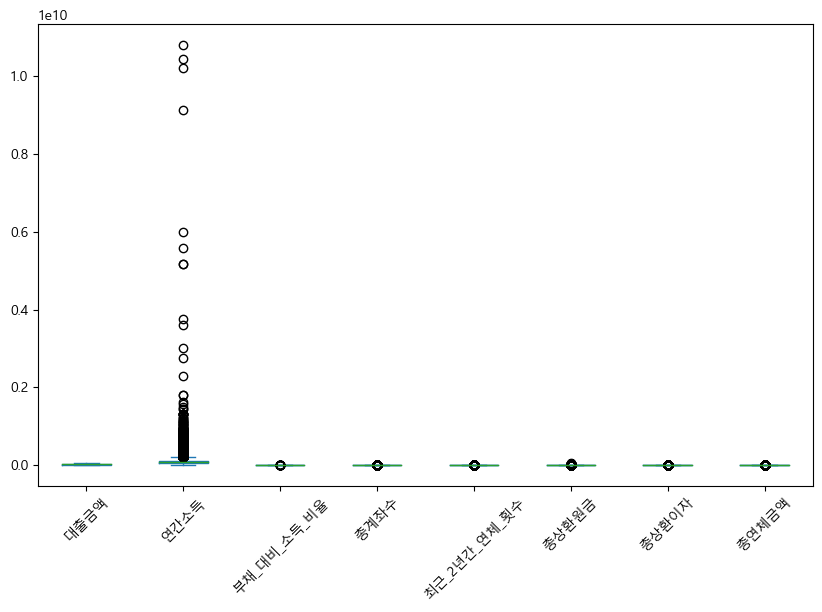

********************************************************************************


In [46]:
cleaned_df.loc[:, ['ID', '대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자','총연체금액']].plot(kind='box', rot=45)
plt.show()

print('*'*80)

#cleaned_df.loc[:,['주택소유상태','ID','대출기간','근로기간','대출목적',].plot(kind='box', rot=45) # no numeric


# 대출금액의 이상치는 존재 x



In [53]:
# 연간소득컬럼의 첫번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

q1 = cleaned_df.loc[:,'연간소득'].quantile(q=0.25)

q3 = cleaned_df.loc[:,'연간소득'].quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_df.loc[:,'연간소득']<min) | (cleaned_df.loc[:,'연간소득']>max)

print('*'*80)

outlier = cleaned_df.loc[condition]

print(f'연간 소득 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_df.loc[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year = cleaned_df.loc[:,'연간소득'].drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year}')

print('*'*80)




1사분위값 : 
57600000.0
********************************************************************************
3사분위값 : 
112800000.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 55200000.0
********************************************************************************
연간 소득 컬럼의 첫번째 정상범위의 최솟값 : -25200000.0
연간 소득 컬럼의 첫번째 정상범위의 최댓값 : 195600000.0
********************************************************************************
********************************************************************************
연간 소득 컬럼의 첫번째 이상치 : 
                ID      대출금액 대출기간 근로기간    주택소유상태       연간소득  부채_대비_소득_비율  \
34     TRAIN_00034  14550000   36    4       OWN  222000000         2.13   
50     TRAIN_00050  14400000   36    <  MORTGAGE  198000000        10.51   
78     TRAIN_00078  33600000   36  10+  MORTGAGE  259200000         4.12   
114    TRAIN_00114  33600000   36    5  MORTGAGE  420000000         2.53   
132    TRAIN_00132  12000000   36    2      RE

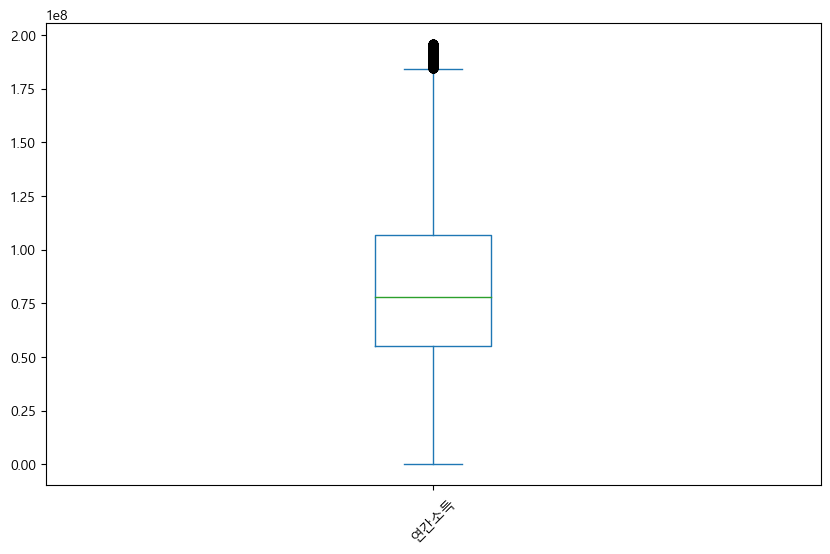

1사분위값 : 
55200000.0
********************************************************************************
3사분위값 : 
106800000.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 51600000.0
********************************************************************************
연간 소득 컬럼의 첫번째 정상범위의 최솟값 : -22200000.0
연간 소득 컬럼의 첫번째 정상범위의 최댓값 : 184200000.0
********************************************************************************
********************************************************************************
연간 소득 컬럼의 첫번째 이상치 : 
134      184800000
312      186000000
323      186000000
550      184800000
617      186000000
           ...    
95755    192000000
95804    192000000
96004    186000000
96076    192000000
96223    186000000
Name: 연간소득, Length: 856, dtype: int64
********************************************************************************
최종 결과 : 
0         72000000
1        130800000
2         96000000
3        132000000
4         717

In [74]:
### 연간 소득 컬럼의 두번째 이상치 판단

# 연간소득컬럼의 두번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year.plot(kind='box', rot=45)
plt.show()

# 이상치 존재..

q1 = cleaned_year.quantile(q=0.25)

q3 = cleaned_year.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_year<min) | (cleaned_year>max)

print('*'*80)

outlier = cleaned_year.loc[condition]

print(f'연간 소득 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_year.loc[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year2 = cleaned_year.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year2}')

print('*'*80)




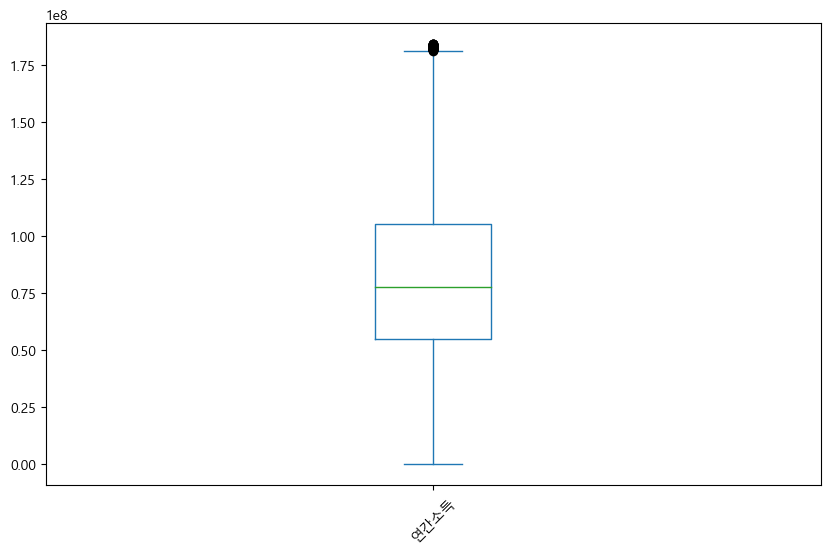

1사분위값 : 
55200000.0
********************************************************************************
3사분위값 : 
105600000.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 50400000.0
********************************************************************************
연간 소득 컬럼의 첫번째 정상범위의 최솟값 : -20400000.0
연간 소득 컬럼의 첫번째 정상범위의 최댓값 : 181200000.0
********************************************************************************
********************************************************************************
연간 소득 컬럼의 첫번째 이상치 : 
637      182880000
743      182400000
893      182400000
950      183600000
3096     183960000
           ...    
94194    183600000
94878    182400000
95239    183600000
95695    182940000
95857    184178400
Name: 연간소득, Length: 106, dtype: int64
********************************************************************************
최종 결과 : 
0         72000000
1        130800000
2         96000000
3        132000000
4         717

In [76]:
### 연간 소득 컬럼의 세번째 이상치 판단

# 연간소득컬럼의 세번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year2.plot(kind='box', rot=45)
plt.show()

# 이상치 존재..

q1 = cleaned_year2.quantile(q=0.25)

q3 = cleaned_year2.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_year2<min) | (cleaned_year2>max)

print('*'*80)

outlier = cleaned_year2.loc[condition]

print(f'연간 소득 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_year2.loc[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year3 = cleaned_year2.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year3}')

print('*'*80)




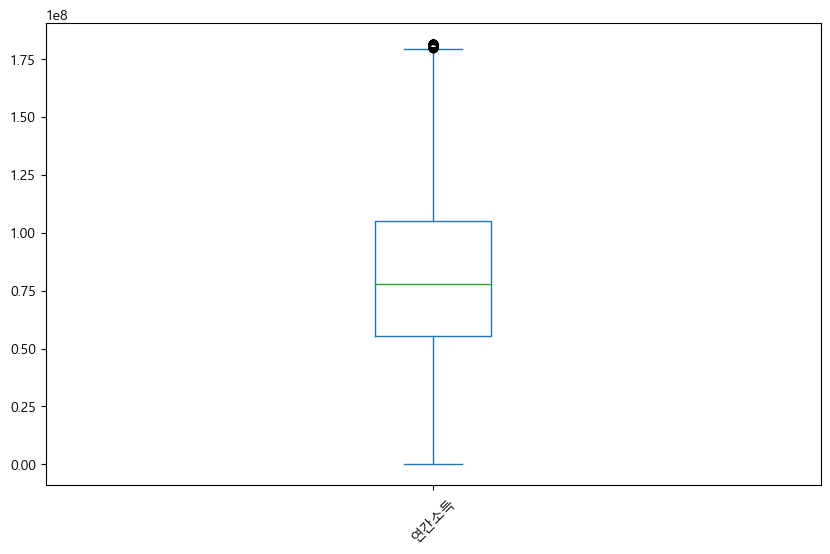

1사분위값 : 
55200000.0
********************************************************************************
3사분위값 : 
105000000.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 49800000.0
********************************************************************************
연간 소득 컬럼의 첫번째 정상범위의 최솟값 : -19500000.0
연간 소득 컬럼의 첫번째 정상범위의 최댓값 : 179700000.0
********************************************************************************
********************************************************************************
연간 소득 컬럼의 첫번째 이상치 : 
77       180000000
153      180000000
158      180000000
246      180000000
252      180000000
           ...    
95627    180000000
95739    180000000
95789    180000000
95875    180000000
96249    180000000
Name: 연간소득, Length: 1147, dtype: int64
********************************************************************************
최종 결과 : 
0         72000000
1        130800000
2         96000000
3        132000000
4         71

In [77]:
### 연간 소득 컬럼의 네 번째 이상치 판단 

# 연간소득컬럼의 네번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year3.plot(kind='box', rot=45)
plt.show()

# 이상치 존재..

q1 = cleaned_year3.quantile(q=0.25)

q3 = cleaned_year3.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_year3<min) | (cleaned_year3>max)

print('*'*80)

outlier = cleaned_year3.loc[condition]

print(f'연간 소득 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_year3.loc[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year4 = cleaned_year3.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year4}')

print('*'*80)




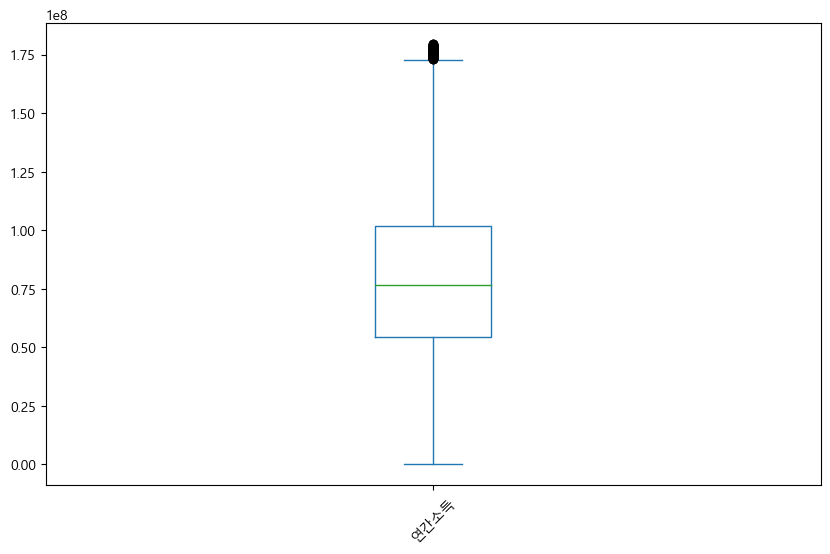

1사분위값 : 
54568800.0
********************************************************************************
3사분위값 : 
102000000.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 47431200.0
********************************************************************************
연간 소득 컬럼의 첫번째 정상범위의 최솟값 : -16578000.0
연간 소득 컬럼의 첫번째 정상범위의 최댓값 : 173146800.0
********************************************************************************
********************************************************************************
연간 소득 컬럼의 첫번째 이상치 : 
62       174000000
72       177600000
271      178800000
445      174000000
456      174000000
           ...    
95858    174000000
95907    176400000
96026    174000000
96161    174000000
96261    174000000
Name: 연간소득, Length: 462, dtype: int64
********************************************************************************
최종 결과 : 
0         72000000
1        130800000
2         96000000
3        132000000
4         717

In [81]:
### 연간 소득 컬럼의 다섯번째 이상치 판단 

# 연간소득컬럼의 다섯번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year4.plot(kind='box', rot=45)
plt.show()

# 이상치 존재..

q1 = cleaned_year4.quantile(q=0.25)

q3 = cleaned_year4.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_year4<min) | (cleaned_year4>max)

print('*'*80)

outlier = cleaned_year4.loc[condition]

print(f'연간 소득 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_year4.loc[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year5 = cleaned_year4.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year5}')

print('*'*80)




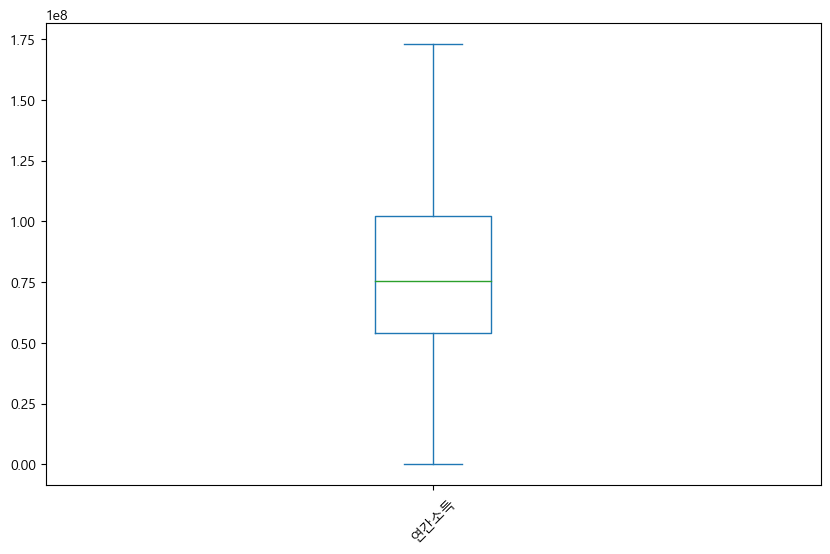

In [82]:
### 연간 소득 컬럼의 여섯번째 이상치 판단 

# 연간소득컬럼의 여섯번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year5.plot(kind='box', rot=45)
plt.show()

# 이제서야 이상치가 제거됨..

## 
#
#q1 = cleaned_year4.quantile(q=0.25)
#
#q3 = cleaned_year4.quantile(q=0.75)
#
#iqr = q3 - q1
#
#print(f'1사분위값 : \n{q1}')
#print('*'*80)
#print(f'3사분위값 : \n{q3}')
#print('*'*80)
#
#print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')
#
#print('*'*80)
#
## 정상 범위의 최솟값
#min = q1 - ( iqr * 1.5)
#print(f'연간 소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')
#
## 정상 범위의 최댓값
#max = q3 + ( iqr * 1.5)
#print(f'연간 소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')
#
#print('*'*80)
#
#condition = (cleaned_year4<min) | (cleaned_year4>max)
#
#print('*'*80)
#
#outlier = cleaned_year4.loc[condition]
#
#print(f'연간 소득 컬럼의 첫번째 이상치 : \n{outlier}')
#
#outlier_index = cleaned_year4.loc[condition].index
#
#print('*'*80)
#
## 이후에 drop()으로 이상치 제거
## df.col.drop(index=[이상치 행의 인덱스])
#cleaned_year5 = cleaned_year4.drop(index=outlier_index)
#print(f'최종 결과 : \n{cleaned_year5}')
#
#print('*'*80)
#
#


In [68]:
cleaned_df.columns


Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'],
      dtype='object')

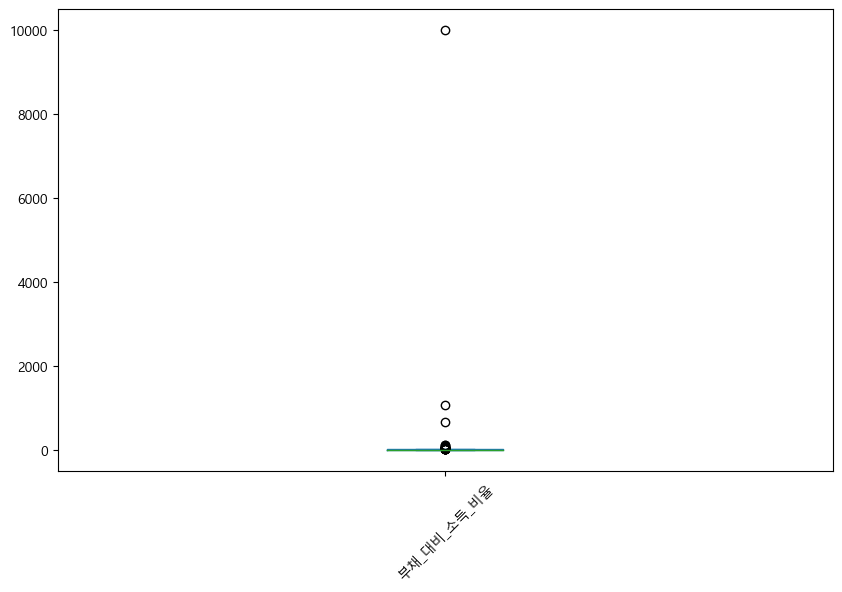

 1사분위값 : 
12.65
********************************************************************************
 3사분위값 : 
25.54
********************************************************************************
부채 대비 소득 비율컬럼의 첫번째 iqr = 12.889999999999999
********************************************************************************
부채 대비 소득 비율 컬럼의 첫번째 정상범위의 최솟값 : -6.684999999999997
부채 대비 소득 비율 컬럼의 첫번째 정상범위의 최댓값 : 6.205000000000002
********************************************************************************
********************************************************************************
부채 대비 소득 비율 컬럼의 첫번째 이상치 : 
                ID      대출금액 대출기간     근로기간    주택소유상태       연간소득  부채_대비_소득_비율  \
0      TRAIN_00000  12480000   36        6      RENT   72000000        18.90   
1      TRAIN_00001  14400000   60      10+  MORTGAGE  130800000        22.33   
2      TRAIN_00002  12000000   36        5  MORTGAGE   96000000         8.60   
3      TRAIN_00003  14400000   36        8  MORTGAGE  132000000        

In [71]:
# 부채 대비 소득 비율 컬럼의 이상치 확인

cleaned_df.loc[:,'부채_대비_소득_비율'].plot(kind='box', rot=45)
plt.show()

# 이상치 존재 

'''
1. IQR = Q3- Q1
2. 젇상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

q1 = cleaned_df.loc[:,'부채_대비_소득_비율'].quantile(q=0.25)

q3 = cleaned_df.loc[:,'부채_대비_소득_비율'].quantile(q=0.75)

iqr = q3 - q1

print(f' 1사분위값 : \n{q1}')
print('*'*80)
print(f' 3사분위값 : \n{q3}')
print('*'*80)

print(f'부채 대비 소득 비율컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상범위의 최솟값

min = q1 - ( iqr * 1.5 ) 
print(f'부채 대비 소득 비율 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상범위의 최댓값
max = q3 - ( iqr * 1.5 ) 
print(f'부채 대비 소득 비율 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_df.loc[:,'부채_대비_소득_비율']<min) | (cleaned_df.loc[:,'부채_대비_소득_비율']>max)

print('*'*80)

outlier = cleaned_df.loc[condition]

print(f'부채 대비 소득 비율 컬럼의 첫번째 이상치 : \n{outlier}')

print('*'*80)

outlier_index = cleaned_df.loc[condition].index
print(f' 부채 대비 소득 비율 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('*'*80)

# 이후에 drop()으로 이상치 제거.
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_ratio = cleaned_df.loc[:,'부채_대비_소득_비율'].drop(index=outlier_index)
print(f'최종 경과 : \n{cleaned_ratio}')

print('*'*80)

# 이상치 존재.

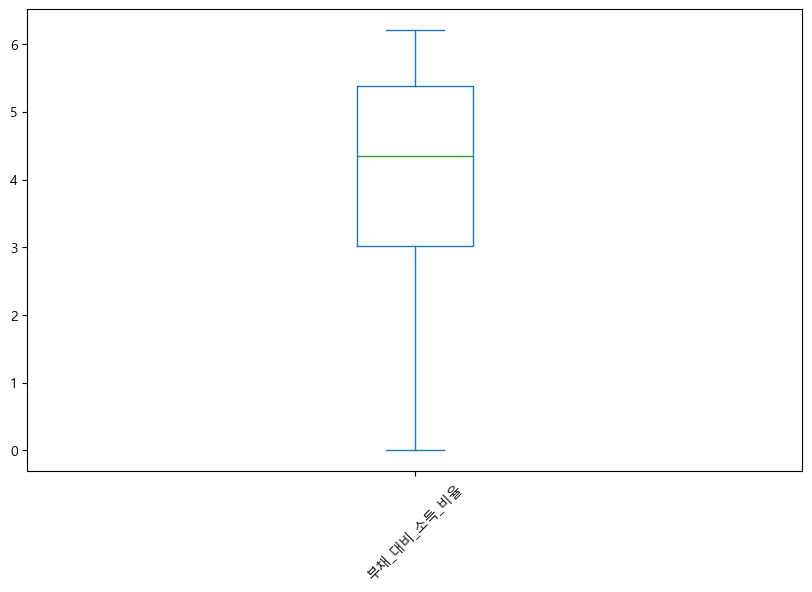

In [72]:
# 부채 대비 소득 비율 컬럼의 두번째 이상치 확인

cleaned_ratio.plot(kind='box', rot=45)
plt.show()



## 이상치 존재하지 않음. 여기서 끝. 
#
#'''
#1. IQR = Q3- Q1
#2. 젇상 범위의 취소 : Q1 - (IQR*1.5)
#3. 정상 범위의 최대 : Q3 + (IQR*1.5)
#'''
#
#q1 = cleaned_df.loc[:,'부채_대비_소득_비율'].quantile(q=0.25)
#
#q3 = cleaned_df.loc[:,'부채_대비_소득_비율'].quantile(q=0.75)
#
#iqr = q3 - q1
#
#print(f' 1사분위값 : \n{q1}')
#print('*'*80)
#print(f' 3사분위값 : \n{q3}')
#print('*'*80)
#
#print(f'부채 대비 소득 비율컬럼의 첫번째 iqr = {iqr}')
#
#print('*'*80)
#
## 정상범위의 최솟값
#
#min = q1 - ( iqr * 1.5 ) 
#print(f'부채 대비 소득 비율 컬럼의 첫번째 정상범위의 최솟값 : {min}')
#
## 정상범위의 최댓값
#max = q3 - ( iqr * 1.5 ) 
#print(f'부채 대비 소득 비율 컬럼의 첫번째 정상범위의 최댓값 : {max}')
#
#print('*'*80)
#
#condition = (cleaned_df.loc[:,'부채_대비_소득_비율']<min) | (cleaned_df.loc[:,'부채_대비_소득_비율']>max)
#
#print('*'*80)
#
#outlier = cleaned_df.loc[condition]
#
#print(f'부채 대비 소득 비율 컬럼의 첫번째 이상치 : \n{outlier}')
#
#print('*'*80)
#
#outlier_index = cleaned_df.loc[condition].index
#print(f' 부채 대비 소득 비율 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')
#
#print('*'*80)
#
## 이후에 drop()으로 이상치 제거.
## df.col.drop(index=[이상치 행의 인덱스])
#cleaned_ratio = cleaned_df.loc[:,'부채_대비_소득_비율'].drop(index=outlier_index)
#print(f'최종 경과 : \n{cleaned_ratio}')
#
#print('*'*80)
#
## 이상치 존재.

In [83]:
cleaned_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'],
      dtype='object')

In [85]:
# 총 계좌 수 컬럼의 첫번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

q1 = cleaned_df.loc[:,'총계좌수'].quantile(q=0.25)

q3 = cleaned_df.loc[:,'총계좌수'].quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총계좌수 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총계좌수 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_df.loc[:,'총계좌수']<min) | (cleaned_df.loc[:,'총계좌수']>max)

print('*'*80)

outlier = cleaned_df.loc[condition]

print(f'총계좌수 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_df.loc[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_counts = cleaned_df.loc[:,'총계좌수'].drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_counts}')

print('*'*80)




1사분위값 : 
17.0
********************************************************************************
3사분위값 : 
32.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 15.0
********************************************************************************
총계좌수 컬럼의 첫번째 정상범위의 최솟값 : -5.5
총계좌수 컬럼의 첫번째 정상범위의 최댓값 : 54.5
********************************************************************************
********************************************************************************
총계좌수 컬럼의 첫번째 이상치 : 
                ID      대출금액 대출기간 근로기간    주택소유상태       연간소득  부채_대비_소득_비율  \
27     TRAIN_00027  12960000   36  10+  MORTGAGE  117600000        36.75   
59     TRAIN_00059  16200000   36    5  MORTGAGE   78000000        33.29   
64     TRAIN_00064  30000000   60  10+  MORTGAGE  120769200        21.85   
102    TRAIN_00102  26400000   60  10+  MORTGAGE   73560000        33.91   
134    TRAIN_00134  15000000   36  10+  MORTGAGE  184800000        18.01   
...   

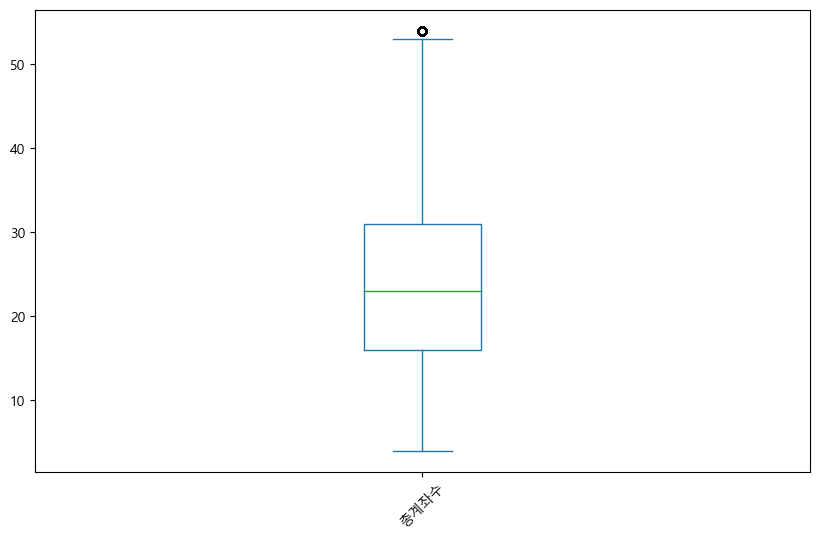

In [86]:
# 총 계좌 수 컬럼의 두번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_counts.plot(kind='box', rot=45)
plt.show()

# 이상치가 존재

#q1 = cleaned_df.loc[:,'총계좌수'].quantile(q=0.25)
#
#q3 = cleaned_df.loc[:,'총계좌수'].quantile(q=0.75)
#
#iqr = q3 - q1
#
#print(f'1사분위값 : \n{q1}')
#print('*'*80)
#print(f'3사분위값 : \n{q3}')
#print('*'*80)
#
#print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')
#
#print('*'*80)
#
## 정상 범위의 최솟값
#min = q1 - ( iqr * 1.5)
#print(f'총계좌수 컬럼의 첫번째 정상범위의 최솟값 : {min}')
#
## 정상 범위의 최댓값
#max = q3 + ( iqr * 1.5)
#print(f'총계좌수 컬럼의 첫번째 정상범위의 최댓값 : {max}')
#
#print('*'*80)
#
#condition = (cleaned_df.loc[:,'총계좌수']<min) | (cleaned_df.loc[:,'총계좌수']>max)
#
#print('*'*80)
#
#outlier = cleaned_df.loc[condition]
#
#print(f'총계좌수 컬럼의 첫번째 이상치 : \n{outlier}')
#
#outlier_index = cleaned_df.loc[condition].index
#
#print('*'*80)
#
## 이후에 drop()으로 이상치 제거
## df.col.drop(index=[이상치 행의 인덱스])
#cleaned_counts = cleaned_df.loc[:,'총계좌수'].drop(index=outlier_index)
#print(f'최종 결과 : \n{cleaned_counts}')
#
#print('*'*80)
#
#


### Label Encoding

In [32]:
kind1 = np.unique(df_train.loc[:,'대출등급'].values)
print(kind1)

['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [33]:
kind2 = np.unique(df_train.loc[:,'근로기간'].values)
print(kind2)




['1 year' '1 years' '10+ years' '10+years' '2 years' '3' '3 years'
 '4 years' '5 years' '6 years' '7 years' '8 years' '9 years' '< 1 year'
 '<1 year' 'Unknown']


In [34]:
kind3 = np.unique(df_train.loc[:,'주택소유상태'].values)
print(kind3)

['ANY' 'MORTGAGE' 'OWN' 'RENT']


# EDA

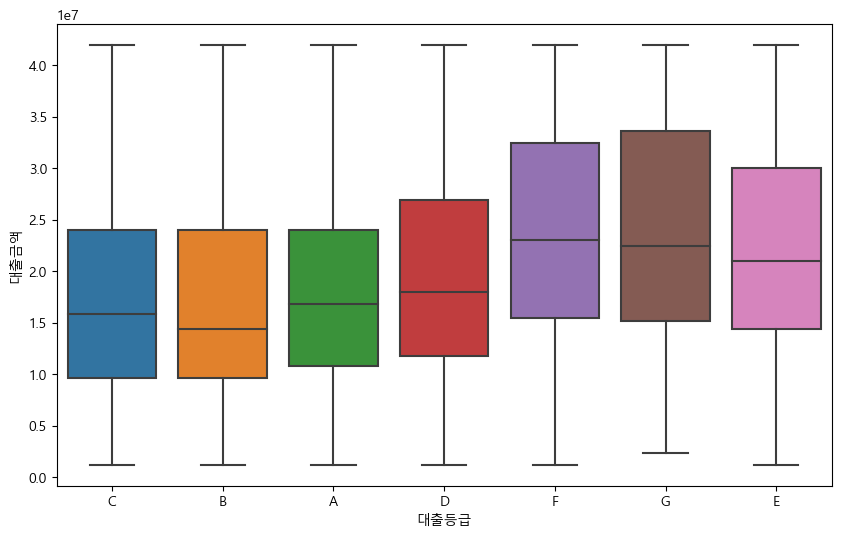

In [35]:
### 고객의 대출금액과 고객의 대출등급과의 관계 분석

sns.boxplot(data=df_train, x='대출등급', y='대출금액')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [36]:
'''

대출금액이 올라갈수록 대출등급이 떨어지거나 하는 뚜렷한 인과는 없지만

대출등급이 높은 집단들은 대부분 대출금액이 적당한 선을 유지하는 것으로 해석된다

'''



'\n\n대출금액이 올라갈수록 대출등급이 떨어지거나 하는 뚜렷한 인과는 없지만\n\n대출등급이 높은 집단들은 대부분 대출금액이 적당한 선을 유지하는 것으로 해석된다\n\n'

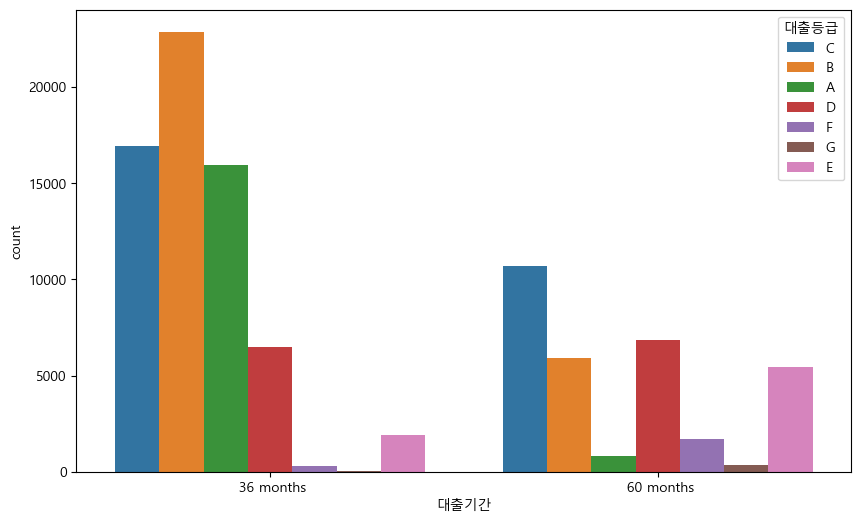

In [37]:
### 고객의 대출기간과 고객의 대출등급의 관계 분석

sns.countplot(data=df_train, x='대출기간', hue='대출등급')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [38]:
'''

36개월 대출한 집단들 중 대출등급 B인원이 제일 많고 F인원이 제일 적다.

60개월 대출한 집단들 중 대출등급 C인원이 제일 많고 G인원이 제일 적다.

이와 같은 결과로 보다 대출등급이 높은 인원일수록 대출이 많고

대출한 개월이 많을수록 대출등급이 낮은 인원들의 수는 감소가 된다.

어찌보면 당연한 사실이다.

'''

'\n\n36개월 대출한 집단들 중 대출등급 B인원이 제일 많고 F인원이 제일 적다.\n\n60개월 대출한 집단들 중 대출등급 C인원이 제일 많고 G인원이 제일 적다.\n\n이와 같은 결과로 보다 대출등급이 높은 인원일수록 대출이 많고\n\n대출한 개월이 많을수록 대출등급이 낮은 인원들의 수는 감소가 된다.\n\n어찌보면 당연한 사실이다.\n\n'

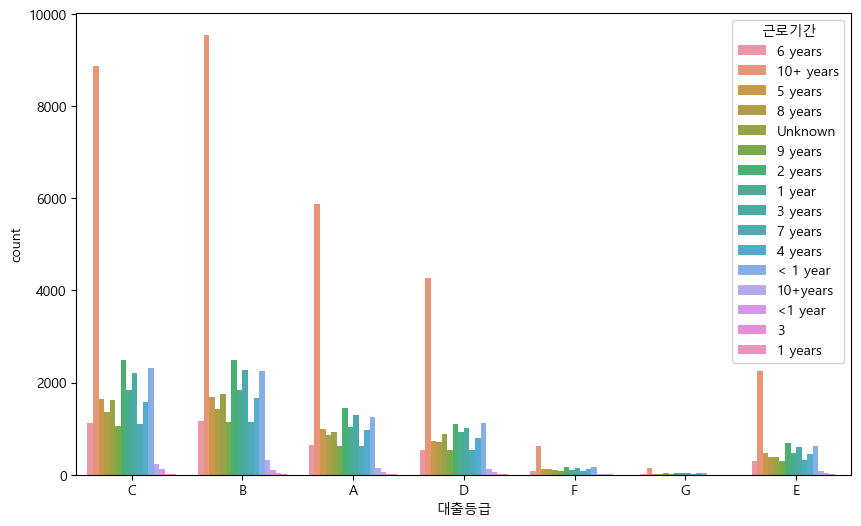

In [39]:
### 근로기간과 고객의 대출등급과의 관계 분석

sns.countplot(data=df_train, x='대출등급', hue='근로기간')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [40]:
'''

10년 이상 근로한 인원이 제일 많은 집단은 B그룹이며, C A D E F G 순서대로 이어진다.

근로한 인원이 높을수록 대출등급자체가 높은 것으로 보인다.

'''



'\n\n10년 이상 근로한 인원이 제일 많은 집단은 B그룹이며, C A D E F G 순서대로 이어진다.\n\n근로한 인원이 높을수록 대출등급자체가 높은 것으로 보인다.\n\n'

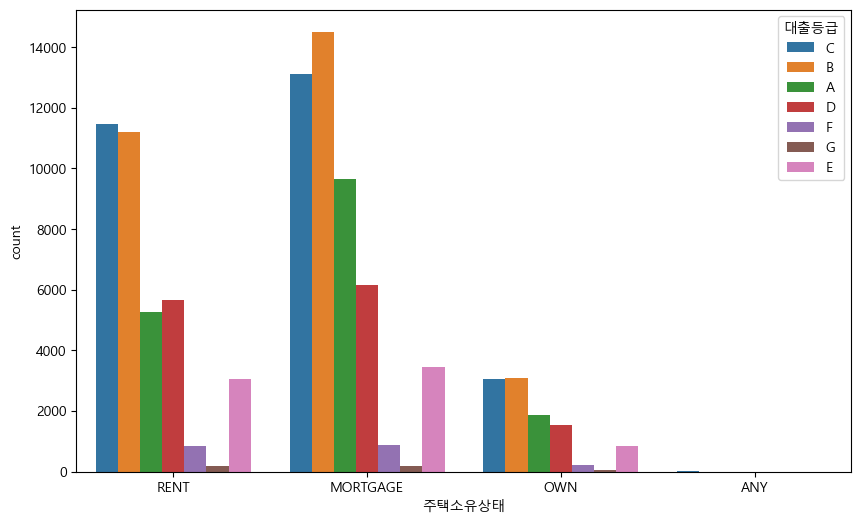

In [41]:
### 주택소유상태와 고객의 대출등급과의 관계 분석

sns.countplot(data=df_train, x='주택소유상태', hue='대출등급')
plt.rcParams['figure.figsize'] = [10,6]
plt.show()


In [42]:
print(df_train)

df_train.isnull().sum()

## 대출기간 컬럼

print('36 months'.split()[0])

cleaned_df.loc[:,'대출기간'] = cleaned_df.loc[:,'대출기간'].apply(lambda x: x.split()[0])
print(cleaned_df)

                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0           

In [43]:
## 근로기간 컬럼

print('6 years'.split()[0])

cleaned_df.loc[:,'근로기간'] = cleaned_df.loc[:, '근로기간'].apply(lambda x: x.split()[0])

print('*'*80)

print('10 +years'.split()[0])

cleaned_df.loc[:,'근로기간'] = cleaned_df.loc[:,'근로기간'].apply(lambda x:x.split()[0])

print('*'*80)

6
********************************************************************************
10
********************************************************************************
